# Predict Harga Mobil Bekas - Final Project Machine Learning 2540110741 - Axel Valent

Mobil bekas saat ini memiliki basis pasar yang sangat besar. Banyak yang mempertimbangkan untuk membeli mobil bekas dibanding mobil baru. Hal ini dikarenakan membeli mobil baru dan menjualnya di hari yang lain itu cenderung cepat turun harganya sekitar 30%. Tentu hal ini juga bergantung kepada orang yang membeli juga, apabila dia ingin mobil yang harga murah dia pilih bekas, dan ada juga yang tidak yakin bahwa membeli mobil bekas itu dapat bertahan lama karena misalnya pengguna sebelumnya memakai mobilnya dengan kasar. Jadi untuk kasus ini khusus untuk memprediksi harga mobil bekas.

# Import Libraries

In [ ]:
#berikut adalah library yang diimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In [ ]:
#disini terdapat dua file csv yang satu berisi train data, satu lagi test data
train_data = pd.read_csv('/content/drive/MyDrive/DatasetFinalProjectML/train-data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/DatasetFinalProjectML/train-data.csv')

In [ ]:
# train_data = pd.read_csv('/content/train-data.csv')
# test_data = pd.read_csv('/content/test-data.csv')

In [ ]:
#untuk line ini hanya untuk mengecek info dari data kolom
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
#line ini untuk melihat 5 data pertama pada dataset training dengan function head
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
#line ini untuk melihat 5 data terakhir pada dataset training dengan function tail
train_data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


# Data Preprocessing

In [ ]:
#berikut adalah untuk melihat training data dari index ke-1 yaitu kolom ke-2
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# describe function
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
# shape data
train_data.shape

(6019, 13)

In [ ]:
#jumlah value pada setiap data di kolom 'Kilometers_Driven'
train_data['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [ ]:
#untuk melihat data uniquenya pada kolom 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
#untuk melihat data yang kosong (null)
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
#drop value yang kosong
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [ ]:
#setelah didrop jadi ada index yang hilang contohnya index ke-55 didelete, jadi dari index 54 langsung ke 56, jadi direset indexnya
train_data = train_data.reset_index(drop=True)

In [ ]:
# for loop pada training data untuk mendapat kata pertama dari kolom yang terpilih
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [ ]:
#mengubah kolom Mileage(km/kg) dan Engine(CC) menjadi tipe datanya float
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [ ]:
#kolom Power(bhp) terpisah di kolom berbeda karena ketika dirun, mendapat error bahwa str tidak bisa diconvert ke float
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

ValueError: ignored

In [ ]:
#oleh karena itu ketika dicari lagi, dapatlah ada index yang hasilnya null pada kolom Power(bhp)
train_data['Power'][76]

'null bhp'

In [ ]:
#lalu diremove indexnya value ini
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [ ]:
#didrop index value yang null tersebut pada cell di atas
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [ ]:
#berikut adalah shape training data yang baru
train_data.shape

(5872, 17)

In [ ]:
#baru dijadikan tipe datanya float
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [ ]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [ ]:
#untuk data yang bukan null dijadikan variable 'New_car_Price' yang baru dan diambil kata pertama seperti process sebelumnya
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [ ]:
#dijadikan tipe datanya float
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [ ]:
#karena sudah dijadikan nama variable yang baru untuk kolom-kolom ini pada proses di atas, kita drop kolom yang lama
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

# Data Visualization

In [ ]:
# info training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [ ]:
#description kolom price
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

<ipython-input-29-00ea0d2f0a47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Price'])


(0.0, 160.0)

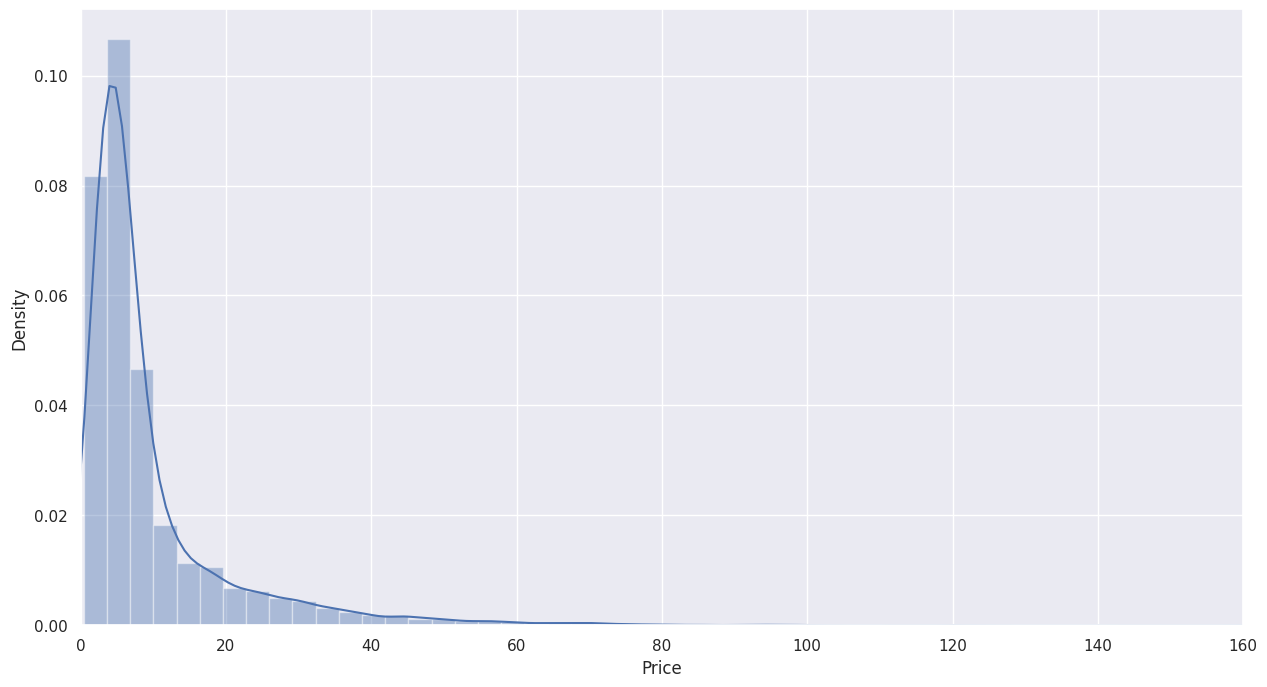

In [ ]:
# pertama diplot dulu target kolom yaitu 'Price' dengan distribution plot
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

bisa dilihat mobil bekas yang harganya di bawah 20 itu lebih banyak, semakin mahal semakin dikit

In [ ]:
#description untuk kolom 'Fuel_Type'
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

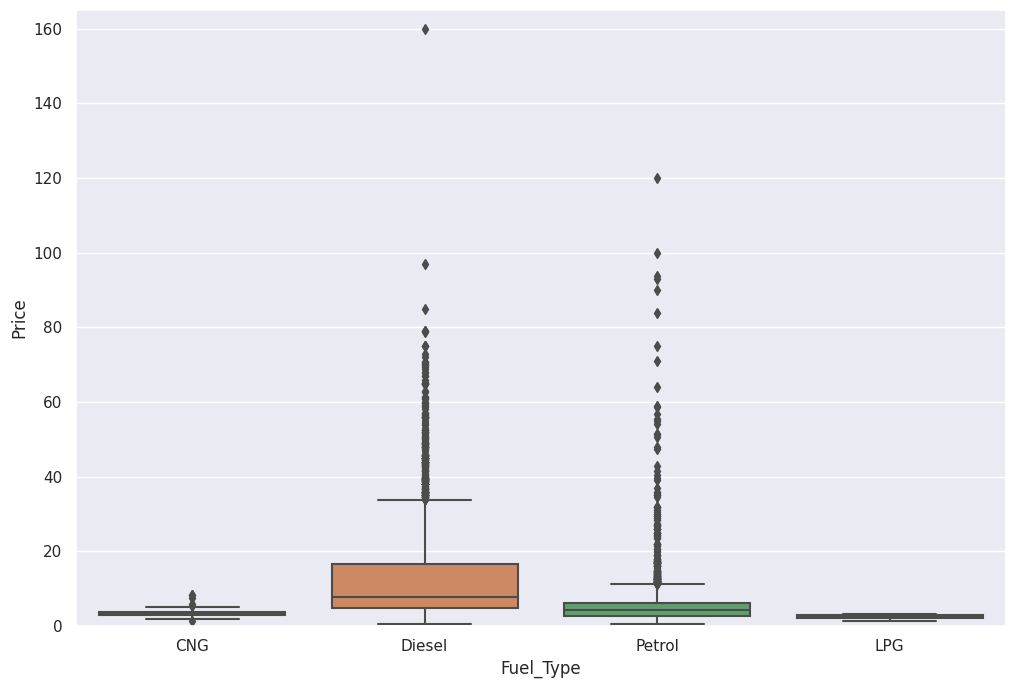

In [ ]:
#untuk kolom Fuel_Type diplot untuk melihat Pricenya dengan boxplot
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

dapat dilihat tipe fuel diesel itu lebih mahal dan lebih banyak dibanding yang lain

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Fuel_Type', ylabel='Price'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


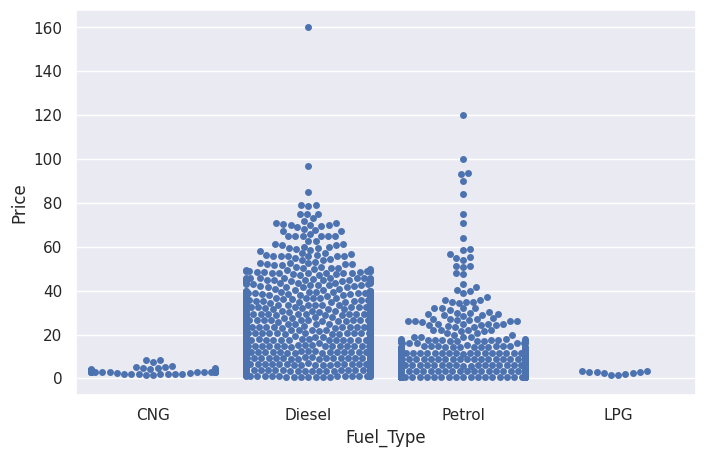

In [ ]:
#pakai swarmplot (lama untuk dirun)

var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.swarmplot(x = var, y ='Price', data = train_data)

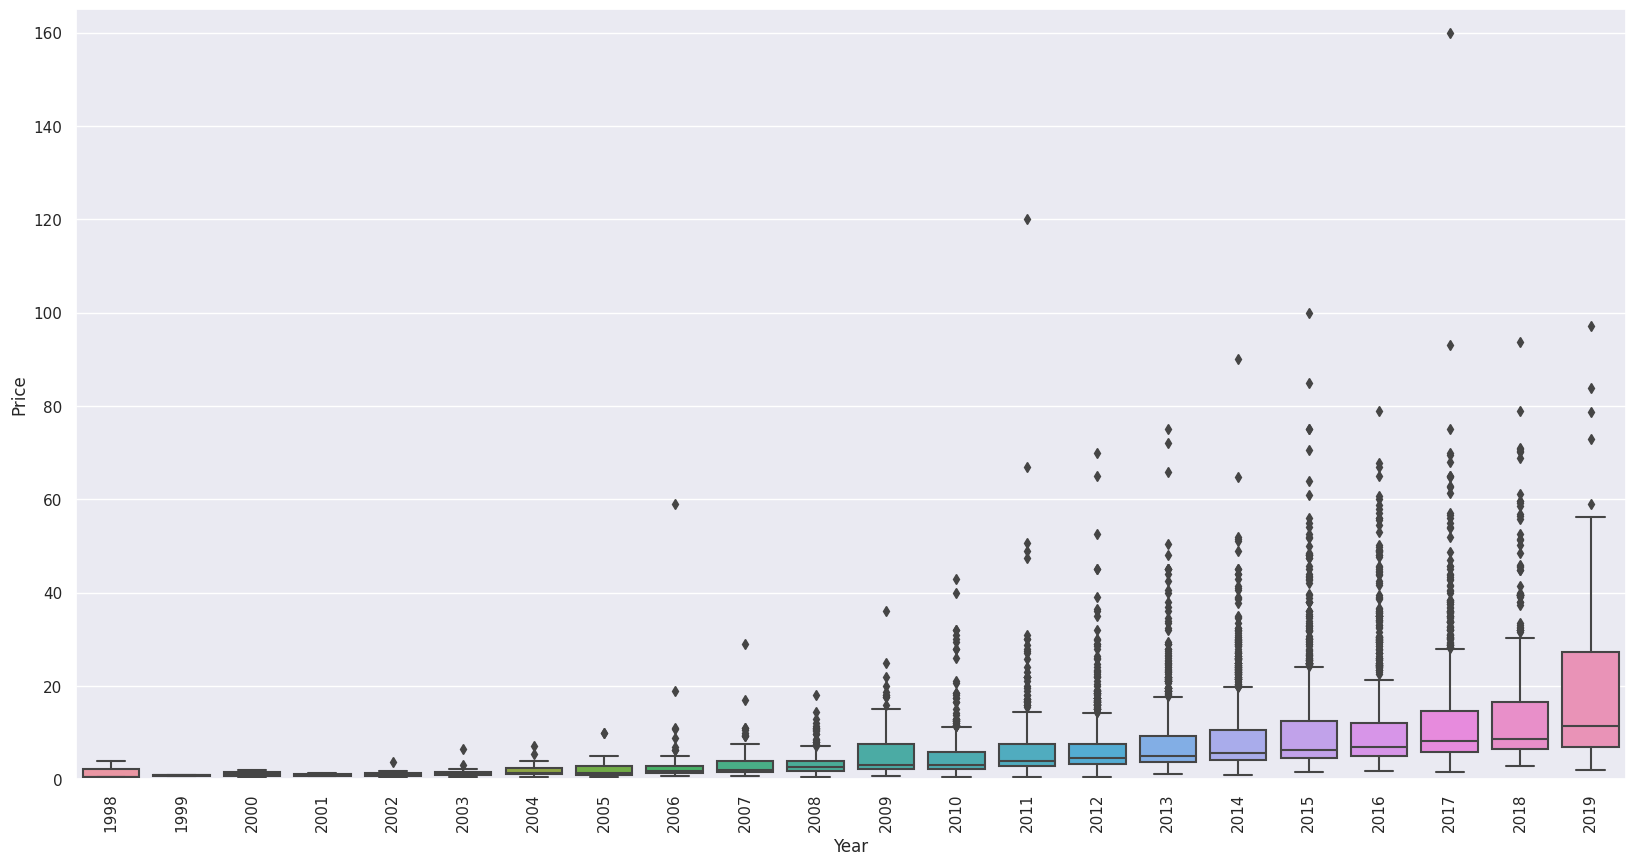

In [ ]:
#boxplot untuk yang kolom Year
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

price untuk model yang tahun lebih baru lebih tinggi dibanding yang model lama

<Axes: xlabel='Owner_Type', ylabel='Price'>

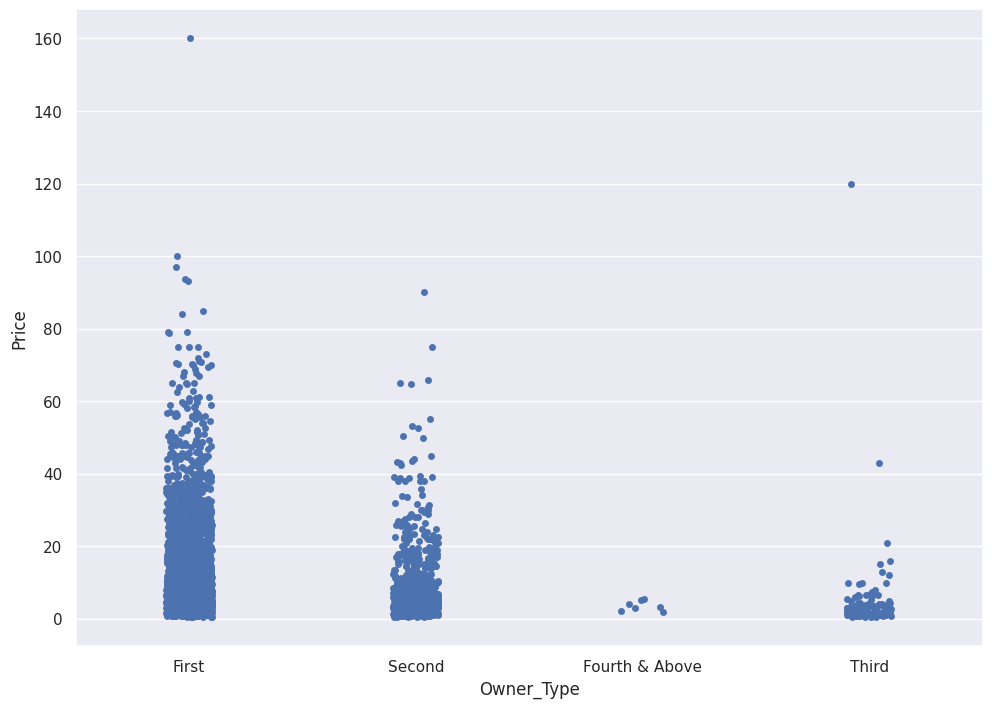

In [ ]:
#strip plot untuk tipe owner yg First, Second, Third, Fourth&Above (owner keberapa milik mobil bekas)
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data)

owner pertama milik mobil bekas lebih banyak dibanding kedua, ketiga, keempat dan selebihnya

<Figure size 2000x1000 with 0 Axes>

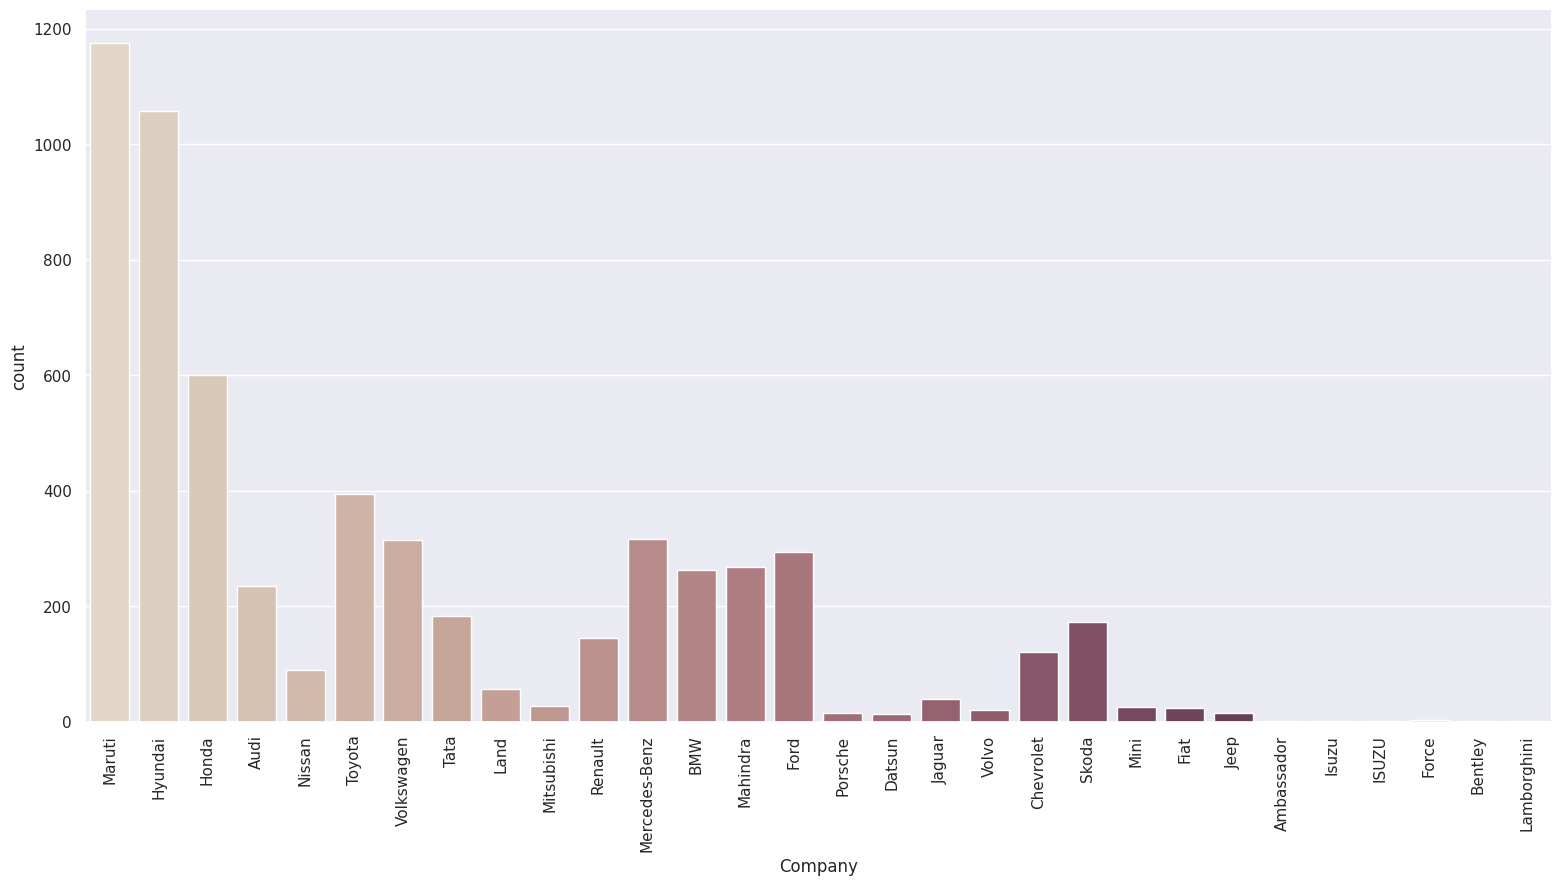

In [ ]:
#catplot untuk kolom Company
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

brand Maruti paling tinggi

#Preprocess Categorical Data

In [ ]:
#jumlah value tiap Location
var = 'Location'
train_data[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

kita bisa anggap bahwa Mumbai memiliki jumlah mobil bekas terbanyak yang dapat dijual

<function matplotlib.pyplot.show(close=None, block=None)>

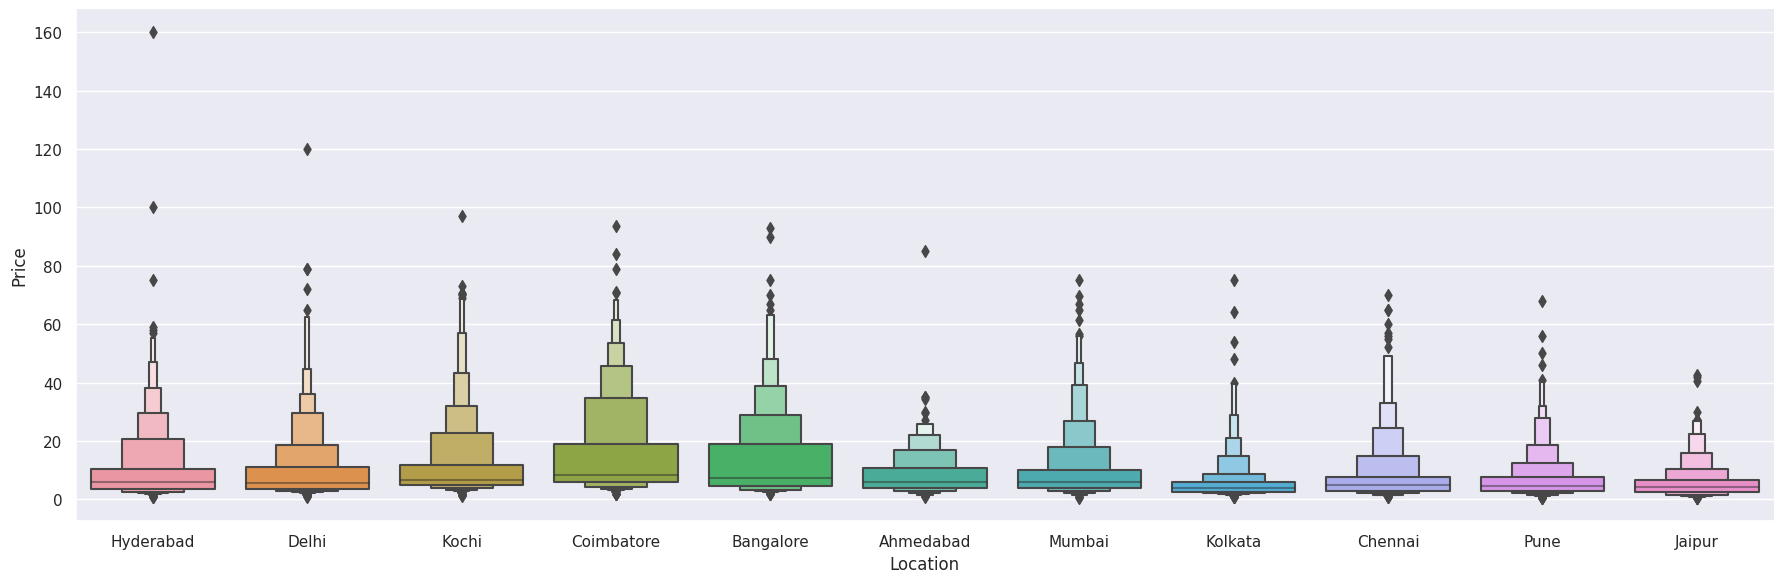

In [ ]:
#catplot location dibanding dengan Pricenya
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
#digunakan one-hot-encoding untuk data di atas, dimana categorical value dijadikan 0 atau 1 saja
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


pd.get_dummies untuk one hot encoding mendapatkan value 0 atau 1 (tidak atau ya), drop_first=True agar extra kolomnya didelete untuk mengurangi korelasi yang dibuat dari dummy misalnya pada kolom Transmission dimana ada Automatic dan Manual, kalau value Automaticnya 0 berarti Manual 1, jadi kita hanya perlu satu kolom saja di antara dua itu karena tiap kolom itu memiliki value 0 atau 1 (tidak atau ya)

In [ ]:
#jumlah tiap value pada kolom 'Fuel_Type'
var = 'Fuel_Type'
train_data[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

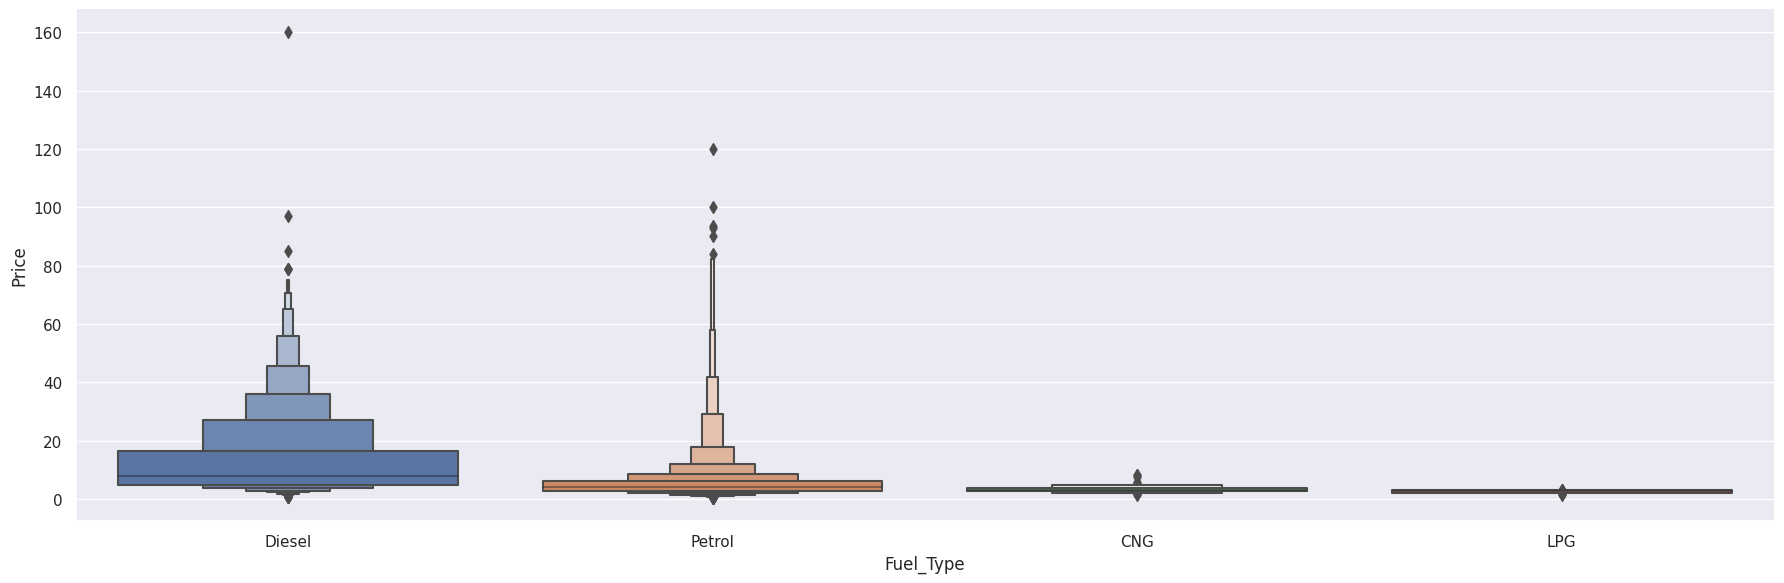

In [ ]:
#catplot Fuel_Type dibanding dengan Pricenya
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
#digunakan one-hot-encoding lagi untuk Fuel_Type
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [ ]:
#jumlah tiap value pada kolom 'Transmission'
var = 'Transmission'
train_data[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

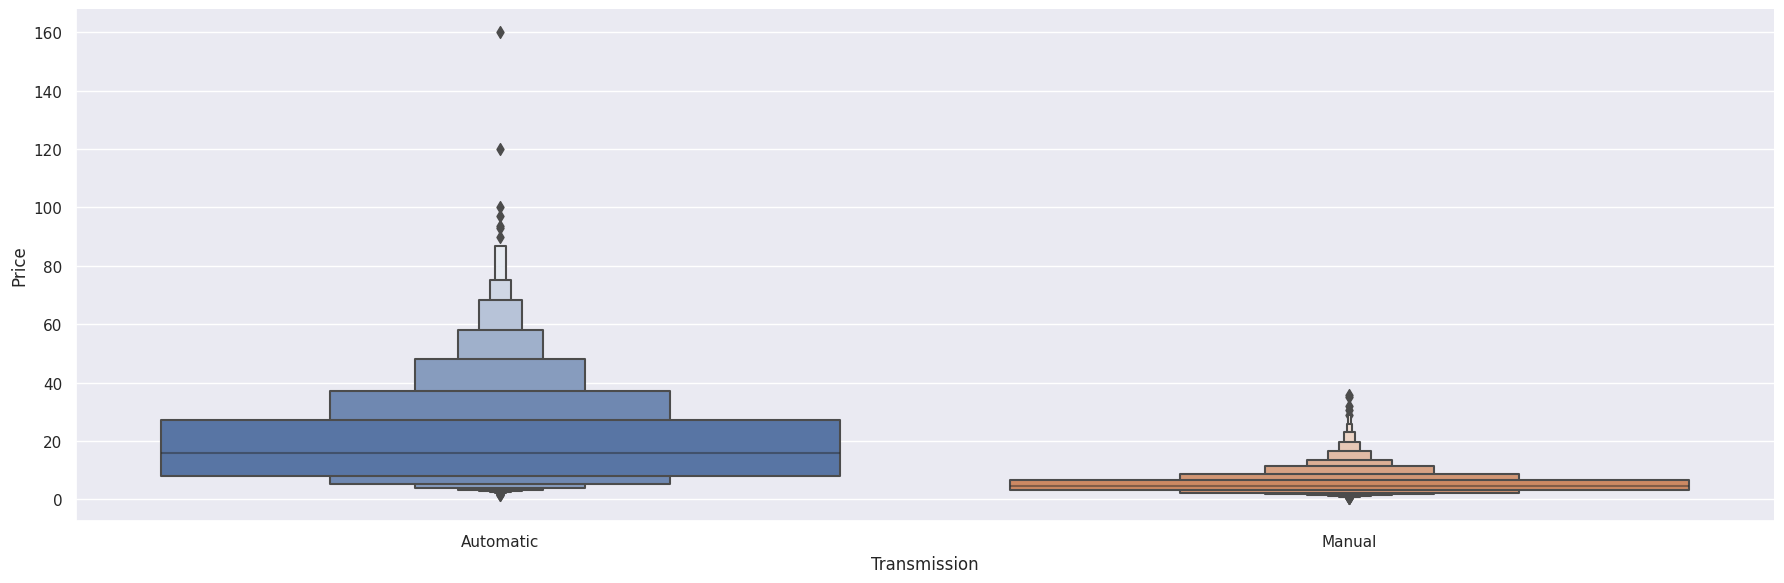

In [ ]:
#catplot Transmission dibanding dengan Pricenya
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
#digunakan one-hot-encoding lagi untuk Transmission
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [ ]:
#jumlah tiap value pada kolom 'Owner_Type'
var = 'Owner_Type'
train_data[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [ ]:
#untuk kolom Owner_Type terdapat jumlah value lebih dari dua jadi dipakai label encoding
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [ ]:
#jumlah tiap value pada kolom 'Company'
var = 'Company'
train_data[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

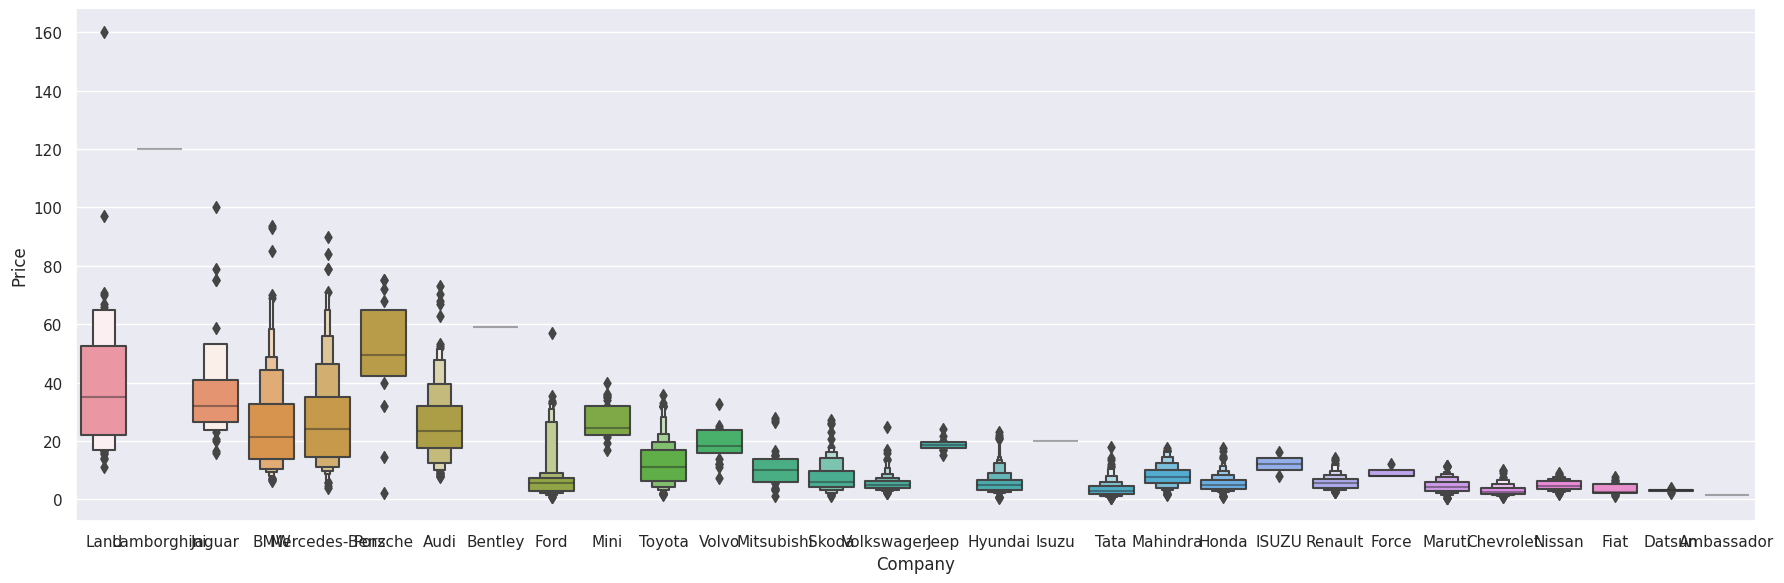

In [ ]:
#catplot Company dibanding dengan Pricenya
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

kolom Company terdapat banyak variasi jadi didrop

In [ ]:
#drop kolom Company
train_data.drop(["Company"],axis=1,inplace=True)

In [ ]:
#digabung data train dengan tabel yang sudah didapat diatas yaitu dengan variabel Location, Fuel_t, dan Transmission jadi data final_train
final_train= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#didrop kolom yang lama yang sudah tidak dipakai
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#berikut adalah shape dari data setelah dipreprocess
final_train.shape

(5872, 22)

# Prepare test data

In [ ]:
#tunjukan 5 example pertama pada test data
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


karena sudah dipreprocess training data di atas, lalu karena file csv test dipisah dari training, test data harus dipreprocess dengan cara yang sama dengan training data di atas.

In [ ]:
#proses preprocess test data sama dengan yang training data di atas
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done')

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done')

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)

test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True)

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done')

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of test data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of test data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of test data After dropping Rows with NULL values in Seats  :  (5975, 13)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (5872, 22)


In [ ]:
#berikut ada 5 example pertama pada test data setelah dipreprocess
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


#Feature Selection yang terakhir

In [ ]:
#berikut adalah kolom data yang terakhir
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
#shapenya
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [ ]:
#mengakses semua data dengan label pada kolom Price
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


<ipython-input-58-070bf2bde9f7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')


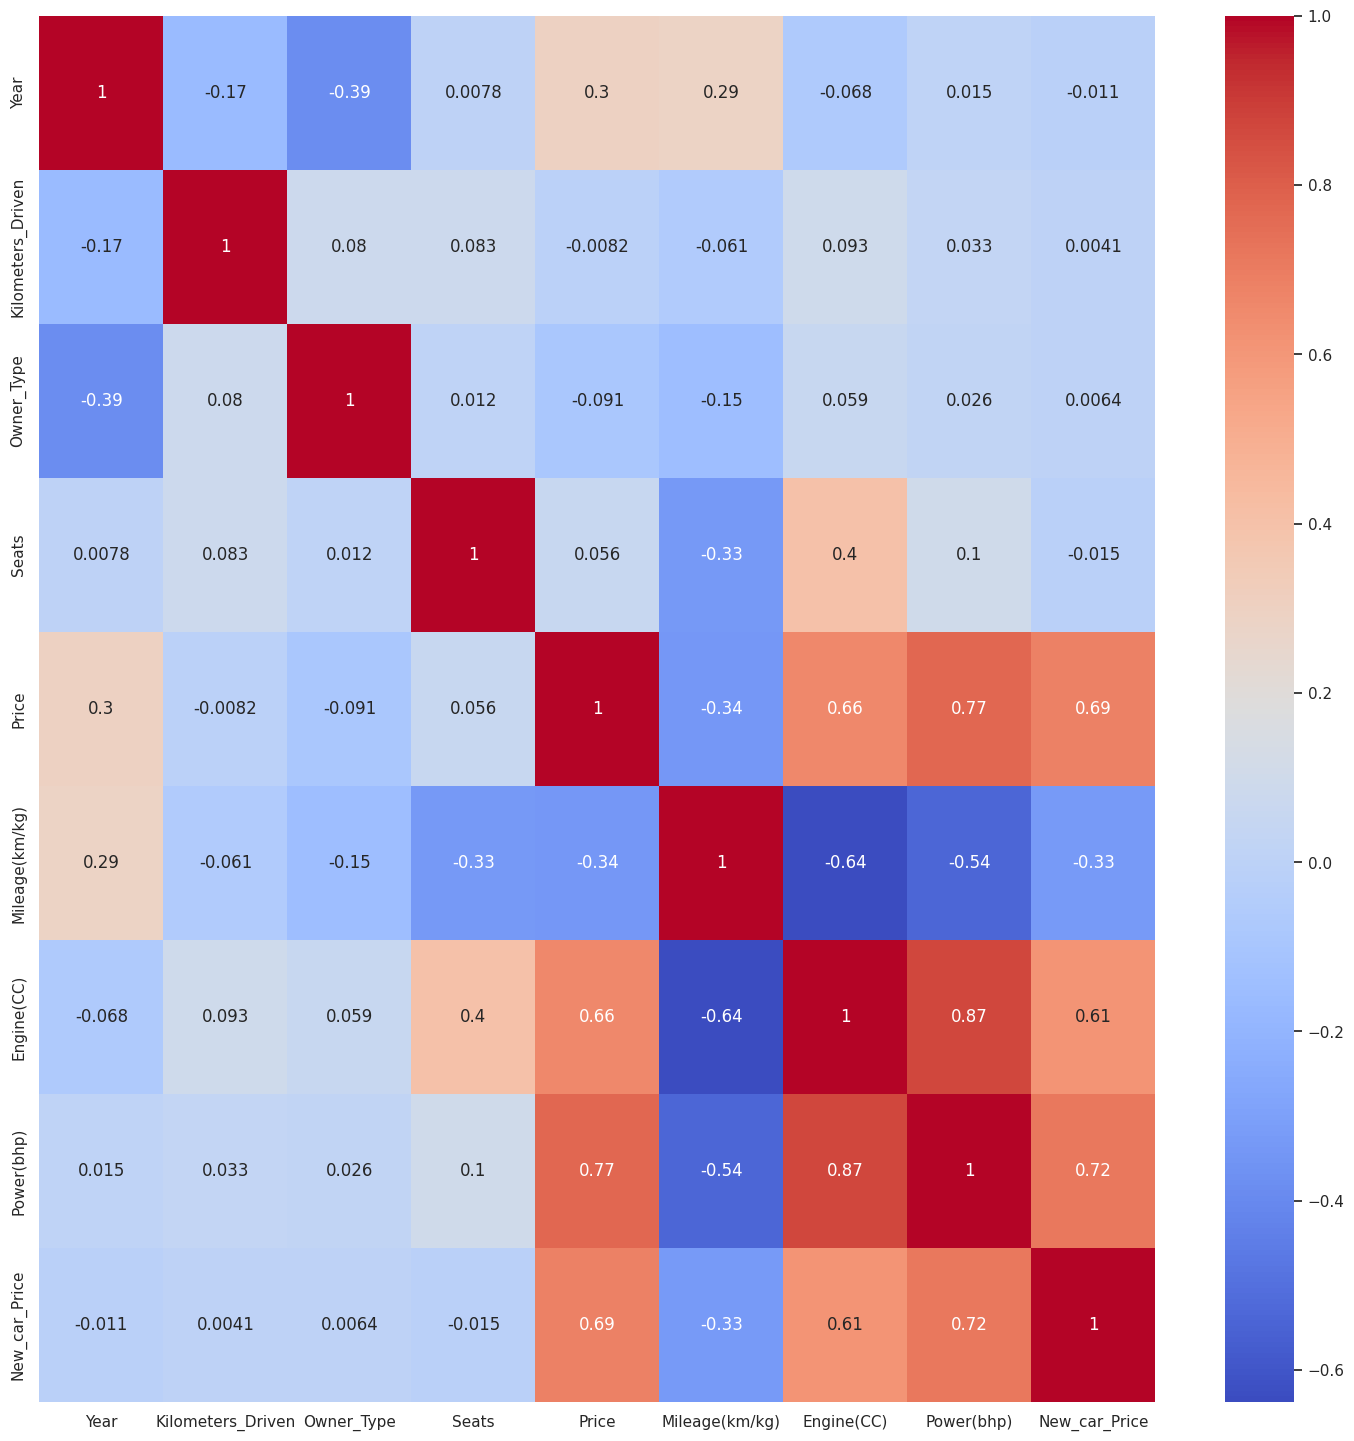

In [ ]:
#korelasi data untuk train data awal
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

plt.show()

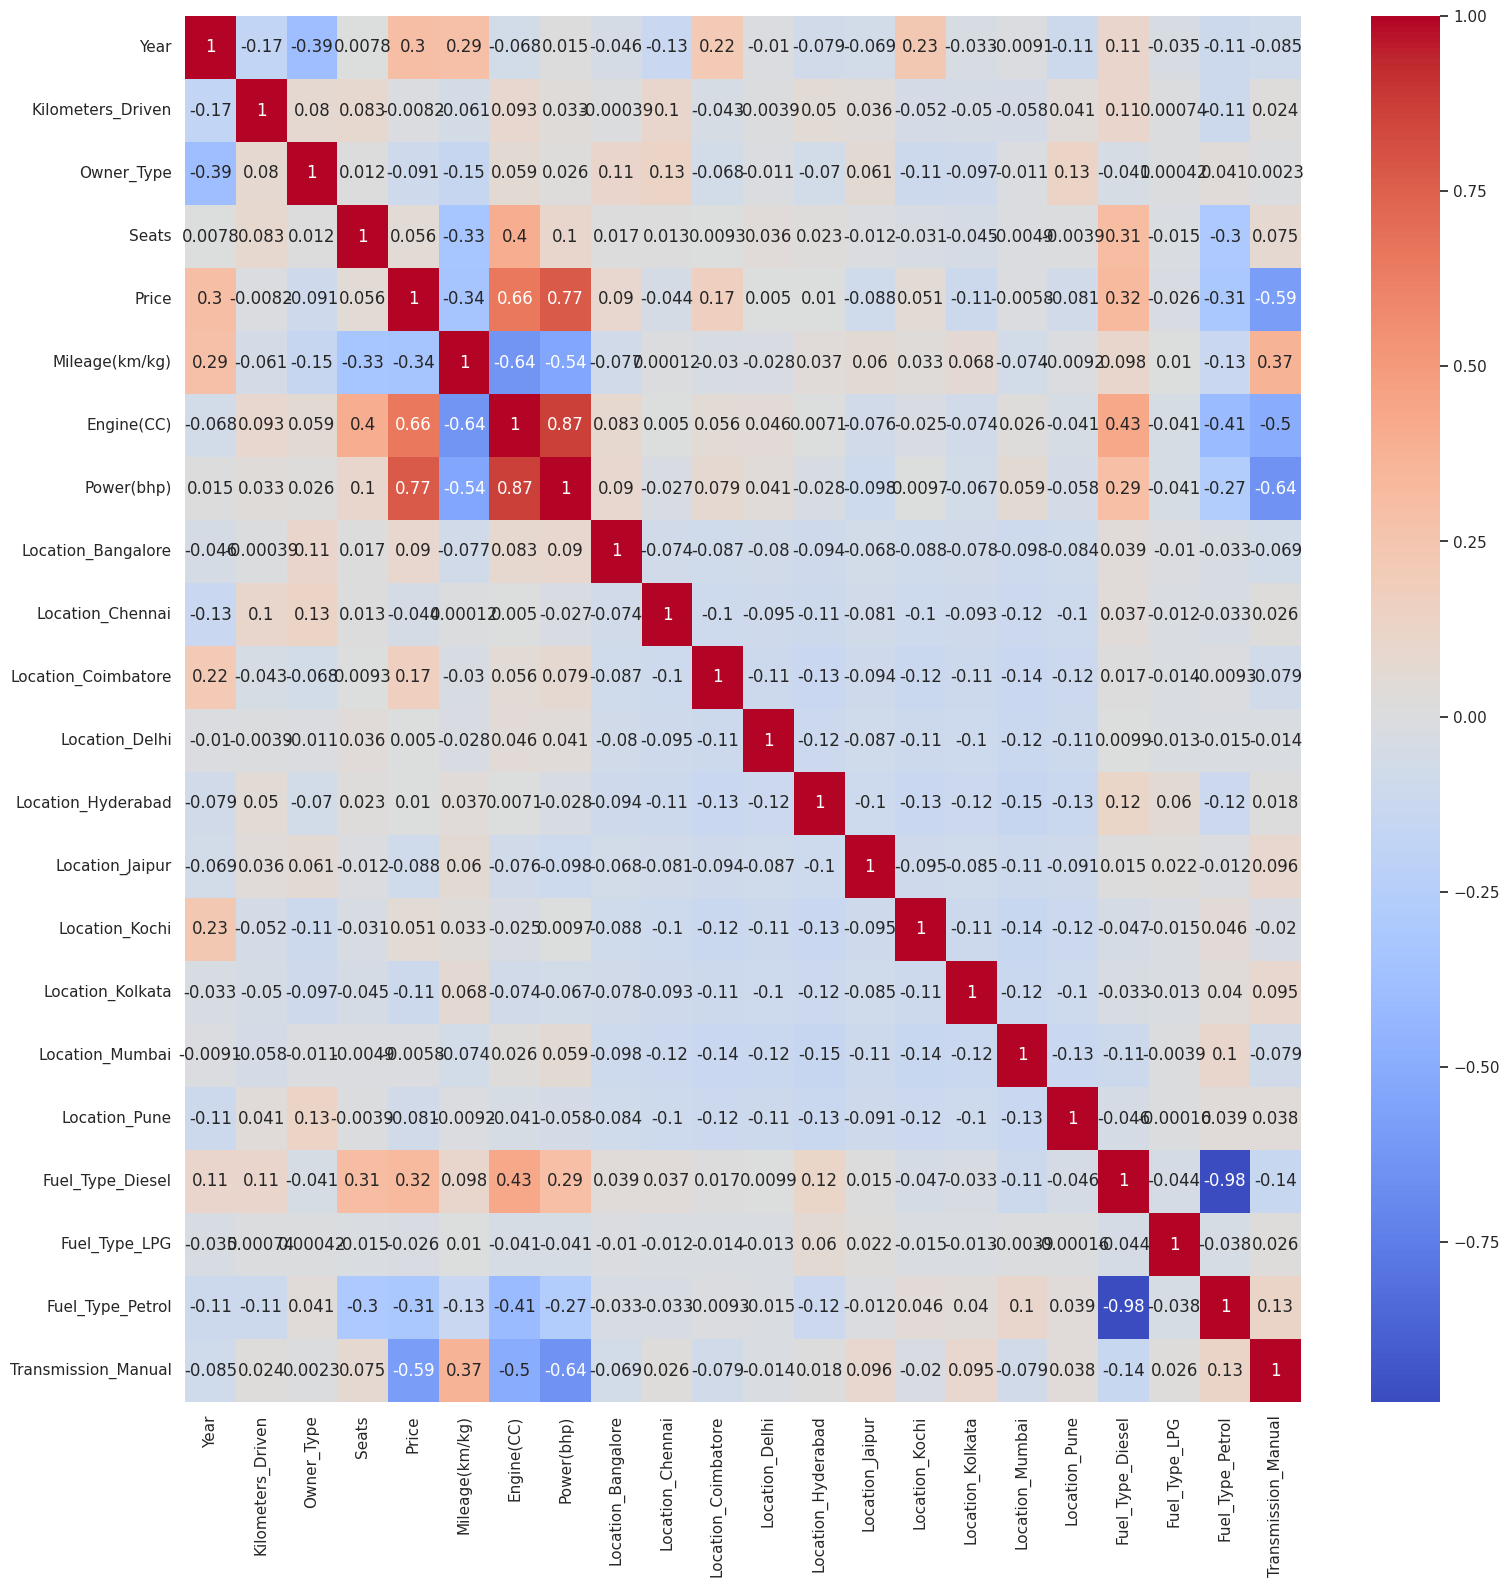

In [ ]:
#korelasi data untuk train data yang terakhir
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='coolwarm')

plt.show()

#Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-60-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

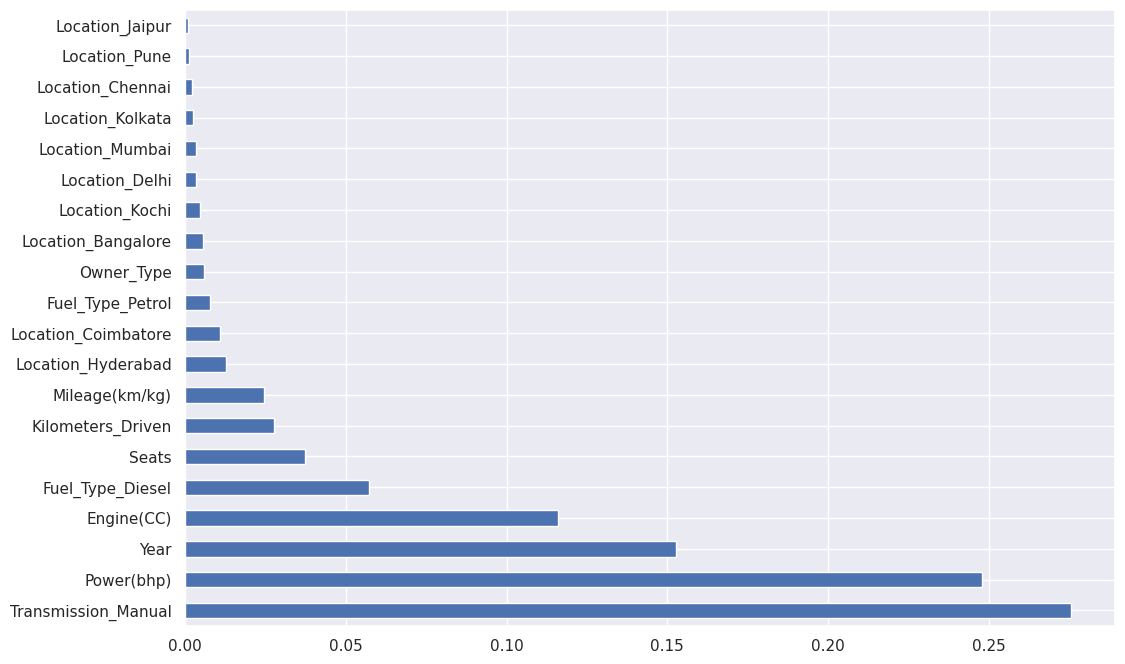

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

seperti yang dapat dilihat digunakan Extra Trees Regressor untuk melihat feature yang paling penting. Dapat dilihat, transmission itu yang paling penting pada mobil bekas ini.

#Modelling

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
#pertama coba pakai linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Using Linear Regression\n")
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Using Linear Regression

Accuracy on Training set:  0.708307028424463
Accuracy on Testing set:  0.6991016530826979


akurasi yang didapat masih agak rendah, jadinya sekarang coba pakai random forest untuk mendapat akurasi yang lebih tinggi

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("\n\nUsing Random Forest Regressor\n")
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-66-dabda9a42061>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)




Using Random Forest Regressor

Accuracy on Training set:  0.9832505839321695
Accuracy on Testing set:  0.9145258838481949


karena sudah tinggi akurasinya sekarang dievaluate

#Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Error Table")
print("")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Error Table

Mean Absolute Error      :  1.4908758855116517
Mean Squared Error       :  10.151147365766828
Root Mean Squared Error  :  3.18608652829248
R Squared Error          :  0.9133790339201765
